here we will classify tv shows based on their features using k means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlxtend
import sklearn

In [32]:
df= pd.read_csv("netflix_titles.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   show_id                     7787 non-null   object 
 1   type                        7787 non-null   object 
 2   title                       7787 non-null   object 
 3   director                    5398 non-null   object 
 4   cast                        7069 non-null   object 
 5   country                     7280 non-null   object 
 6   date_added                  7777 non-null   object 
 7   release_year                7787 non-null   int64  
 8   rating                      7780 non-null   object 
 9   duration                    7787 non-null   object 
 10  genre                       7787 non-null   object 
 11  IMDB_weighted_average_vote  7787 non-null   float64
 12  IMDB_total_votes            7787 non-null   int64  
 13  IMDB_us_voters_rating       7787 

taking only description titles and getting each of them as dummies

In [34]:
df.drop(["show_id","date_added","duration","cast","rating","reviews_from_users","reviews_from_critics","country","IMDB_weighted_average_vote","director","IMDB_total_votes","IMDB_non_us_voters_rating","IMDB_us_voters_rating"],axis=1,inplace=True)
df1=df[df["type"]=="TV Show"]

In [ ]:
df1[['g1','g2','g3','g4','g5','g6']]=df1.genre.str.split(', ',expand=True)

In [36]:
df1=df1.replace({'g1':{'International TV Shows': "itv1" , 'Crime TV Shows':"ctv1", 'Anime Series':"as1",
       'Reality TV':'rtv1', 'TV Comedies':"tvc1", 'Documentary':"d1", 'British TV Shows':"btv1",
       "Kids' TV":"ktv1", 'TV Shows':"tvs1", 'Stand-Up Comedy':"suc1", 'TV Drama':"tvd1", 'TV Horror':"tvh1",
       'TV Action':"tva1", 'Classic':"c1", 'Romantic TV Shows':"rtv1", 'TV Sci-Fi':"tvsf1",'TV Mysteries':"tvm1",' Adventure':"a1",'Science':"s1"
       ,'Korean TV Shows':"ktvs1",' Fantasy':"f1",' Talk Shows':"ts1",' Cult TV':"ctv1"}})  

df1=df1.replace({'g2':{'International TV Shows': "itv2" , 'Crime TV Shows':"ctv2", 'Anime Series':"as2",
       'Reality TV':'rtv2', 'TV Comedies':"tvc2", 'Documentary':"d2", 'British TV Shows':"btv2",
       "Kids' TV":"ktv2", 'TV Shows':"tvs2", 'Stand-Up Comedy':"suc2", 'TV Drama':"tvd2", 'TV Horror':"tvh2",
       'TV Action':"tva2", 'Classic':"c2", 'Romantic TV Shows':"rtv2", 'TV Sci-Fi':"tvsf2",'TV Mysteries':"tvm2",' Adventure':"a2",'Science':"s2"
       ,'Korean TV Shows':"ktvs2",' Fantasy':"f2",' Talk Shows':"ts2",' Cult TV':"ctv2"}})  

df1=df1.replace({'g3':{'International TV Shows': "itv3" , 'Crime TV Shows':"ctv3", 'Anime Series':"as3",
       'Reality TV':'rtv3', 'TV Comedies':"tvc3", 'Documentary':"d3", 'British TV Shows':"btv3",
       "Kids' TV":"ktv3", 'TV Shows':"tvs3", 'Stand-Up Comedy':"suc3", 'TV Drama':"tvd3", 'TV Horror':"tvh3",
       'TV Action':"tva3", 'Classic':"c3", 'Romantic TV Shows':"rtv3", 'TV Sci-Fi':"tvsf3",'TV Mysteries':"tvm3",' Adventure':"a3",'Science':"s3"
       ,'Korean TV Shows':"ktvs3",' Fantasy':"f3",' Talk Shows':"ts3",' Cult TV':"ctv3"}})  

df1=df1.replace({'g4':{'International TV Shows': "itv4" , 'Crime TV Shows':"ctv4", 'Anime Series':"as4",
       'Reality TV':'rtv4', 'TV Comedies':"tvc4", 'Documentary':"d4", 'British TV Shows':"btv4",
       "Kids' TV":"ktv4", 'TV Shows':"tvs4", 'Stand-Up Comedy':"suc4", 'TV Drama':"tvd4", 'TV Horror':"tvh4",
       'TV Action':"tva4", 'Classic':"c4", 'Romantic TV Shows':"rtv4", 'TV Sci-Fi':"tvsf4",'TV Mysteries':"tvm4",' Adventure':"a4",'Science':"s4"
       ,'Korean TV Shows':"ktvs4",' Fantasy':"f4",' Talk Shows':"ts4",' Cult TV':"ctv4"}})  

df1=df1.replace({'g5':{'International TV Shows': "itv5" , 'Crime TV Shows':"ctv5", 'Anime Series':"as5",
       'Reality TV':'rtv5', 'TV Comedies':"tvc5", 'Documentary':"d5", 'British TV Shows':"btv5",
       "Kids' TV":"ktv5", 'TV Shows':"tvs5", 'Stand-Up Comedy':"suc5", 'TV Drama':"tvd5", 'TV Horror':"tvh5",
       'TV Action':"tva5", 'Classic':"c5", 'Romantic TV Shows':"rtv5", 'TV Sci-Fi':"tvsf5",'TV Mysteries':"tvm5",' Adventure':"a5",'Science':"s5"
       ,'Korean TV Shows':"ktvs5",' Fantasy':"f5",' Talk Shows':"ts5",' Cult TV':"ctv5"}})  

df1=df1.replace({'g6':{'International TV Shows': "itv6" , 'Crime TV Shows':"ctv6", 'Anime Series':"as6",
       'Reality TV':'rtv6', 'TV Comedies':"tvc6", 'Documentary':"d6", 'British TV Shows':"btv6",
       "Kids' TV":"ktv6", 'TV Shows':"tvs6", 'Stand-Up Comedy':"suc6", 'TV Drama':"tvd6", 'TV Horror':"tvh6",
       'TV Action':"tva6", 'Classic':"c6", 'Romantic TV Shows':"rtv6", 'TV Sci-Fi':"tvsf6",'TV Mysteries':"tvm6",' Adventure':"a6",'Science':"s6"
       ,'Korean TV Shows':"ktvs6",' Fantasy':"f6",' Talk Shows':"ts6",' Cult TV':"ctv6"}})
                     

In [38]:
g1=pd.get_dummies(df1["g1"],drop_first=True)
g2=pd.get_dummies(df1["g2"],drop_first=True)
g3=pd.get_dummies(df1["g3"],drop_first=True)
g4=pd.get_dummies(df1["g4"],drop_first=True)
g5=pd.get_dummies(df1["g5"],drop_first=True)
g6=pd.get_dummies(df1["g6"],drop_first=True)


df1.drop(["genre","type","g1","g2","g3","g4","g5","g6",'release_year'],axis=1,inplace=True)

df1= pd.concat([df1,g1,g2,g3,g4,g5,g6],axis=1)

In [39]:
df1.head(1)

,title,as1,btv1,c1,ctv1,d1,itv1,ktv1,rtv1,suc1,...,tva4,tvc4,tvd4,tvh4,tvm4,tvsf4,f5,tvd5,tvh5,tvsf5
0,3%,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df1["1"]=df1["itv1"]+df1['itv2']+df1['itv3']+df1['itv4']
df1['2']=df1["ctv1"]+df1['ctv2']+df1['ctv3']
df1["3"]=df1["as1"]
df1["4"]=df1["rtv1"]+df1['rtv2']+df1['rtv3']
df1["5"]=df1["tvc1"]+df1['tvc2']+df1['tvc3']+df1['tvc4']
df1["6"]=df1["d1"]+df1['d2']+df1['d3']
df1["7"]=df1["btv1"]
df1["8"]=df1["ktv1"]+df1['ktv2']+df1['ktv3']+df1['ktv4']
df1["9"]=df1["tvs1"]
df1["10"]=df1["suc1"]+df1['suc2']+df1['suc3']
df1["11"]=df1["tvd1"]+df1['tvd2']+df1['tvd3']+df1['tvd4']+df1['tvd5']
df1["12"]=df1["tvh1"]+df1['tvh2']+df1['tvh3']+df1['tvh4']+df1['tvh5']
df1["13"]=df1["tva1"]+df1['tva2']+df1['tva3']+df1['tva4']
df1["14"]=df1["c1"]+df1['c2']
df1["15"]=df1["rtv1"]+df1['rtv2']+df1['rtv3']
df1["16"]=df1["tvsf1"]+df1['tvsf2']+df1['tvsf3']+df1['tvsf4']+df1['tvsf5']
df1["17"]=df1['a2']+df1['a3']+df1['a4']
df1["18"]=df1['s2']+df1['s3']
df1["19"]=df1['ktvs2']+df1['ktvs3']
df1["20"]=df1['f2']+df1['f3']+df1['f4']+df1['f5']
df1["21"]=df1['ts2']+df1['ts3']+df1['ts4']
df1["22"]=df1["ctv1"]+df1['ctv2']+df1['ctv3']
df1=df1[["title",'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22']]


In [41]:
df1.head(1)

,title,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,3%,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [42]:
df1.rename(columns={'1':'international','2':'crime','3':'anime','4':'reality','5':'comedy','6':'documentary','7':'british tv','8':'kids',
                    '9':'tv','10':'standup','11':'drama','12':'horror','13':'action','14':'classic','15':'romantic',
                    '16':'scifi','17':'adventure','18':'science','19':'korean','20':'fantasy','21':'talk','22':'cult'})

,title,international,crime,anime,reality,comedy,documentary,british tv,kids,tv,...,action,classic,romantic,scifi,adventure,science,korean,fantasy,talk,cult
0,3%,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1983,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1994,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,Feb-09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,Zindagi Gulzar Hai,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7775,Zoids Wild,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7777,Zombie Dumb,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7779,Zona Rosa,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# using KMeans clustering

In [43]:
import sklearn.cluster as cluster

In [44]:
final_data_1=df1

 elbow method for best no. of clusters

In [15]:
k=range(0,180,20)
wss=[]
for i in k:
    kmeans=cluster.KMeans(n_clusters=i+1)
    kmeans=kmeans.fit(final_data_1.drop("title",axis=1))
    wss_=kmeans.inertia_
    wss.append(wss_)

In [16]:
centres=pd.DataFrame({"no_of_clusters":k,"wss":wss})
centres.drop(centres[centres['no_of_clusters']==0].index,axis=0,inplace=True)

In [17]:
centres

,no_of_clusters,wss
1,20,1.026218e+03
2,40,5.382008e+02
3,60,2.848832e+02
4,80,1.501736e+02
5,100,8.066308e+01
6,120,3.740272e+01
7,140,1.662656e+01
8,160,2.281744e-28


so choosing 160 clusters( also by using a slightly large number we get a reasonable no.of items)

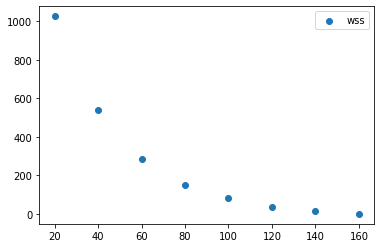

In [18]:
plt.scatter(x='no_of_clusters',y="wss",data=centres)
plt.legend()

from graph too 160 is quiet stable


In [22]:
final_data_2=df1

In [23]:
final_data_2

,title,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,3%,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1983,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1994,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,Feb-09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,Zindagi Gulzar Hai,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7775,Zoids Wild,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7777,Zombie Dumb,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7779,Zona Rosa,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
kmeans=cluster.KMeans(n_clusters=160)
clusters=kmeans.fit_predict(final_data_2.drop("title",axis=1))

In [25]:
clusters

array([78,  1, 10, ..., 95, 17, 13])

In [26]:
final_data_2["clusters"]=clusters

 put data like this- international,crime,anime,reality,comedy,documentary,british tv,kids,
                    tv,standup,drama,horror,action,classic,romantic,
                    scifi,adventure,science,korean,fantasy,talk,cult

# now input the data of marvel series: Loki and will check the recommanded shows

In [29]:
test_cluster=kmeans.predict([[1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1,0,1,0,0]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


recommanded shows

In [30]:
final_data_2[final_data_2["clusters"]==test_cluster[0]].title

108                        3Below: Tales of Arcadia
1869    DreamWorks How to Train Your Dragon Legends
3246                 Jurassic World Camp Cretaceous
4589                  Oh No! It's an Alien Invasion
5554             She-Ra and the Princesses of Power
6310                              The Dragon Prince
6584                            The Legend of Korra
6703                      The New Legends of Monkey
7232                                   Trollhunters
7650                      Wizards: Tales of Arcadia
Name: title, dtype: object